In [1]:
import pymongo
import pandas as pd
import string
from wordcloud import STOPWORDS
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
myclient = pymongo.MongoClient("mongodb://localhost:27017/")
mydb = myclient["mydatabase4"]
mycoll = mydb["mydb_coll"]

In [3]:
d = mycoll.find()
df = pd.DataFrame(data=d)
df.head()

_id                    date  \
0  61109ca0b875a549d0d449c1 2021-08-09 06:10:24.347   
1  61109ca0b875a549d0d449c2 2021-08-09 06:10:24.431   
2  61109ca0b875a549d0d449c3 2021-08-09 06:10:24.525   
3  61109ca0b875a549d0d449c4 2021-08-09 06:10:24.531   
4  61109ca0b875a549d0d449c5 2021-08-09 06:10:24.559   

                                                link  \
0        https://en.wikipedia.org/wiki/AL_fajer_L-10   
1              https://en.wikipedia.org/wiki/CAC_Fox   
2             https://en.wikipedia.org/wiki/CAC_K100   
3     https://en.wikipedia.org/wiki/Dassault_LOGIDUC   
4  https://en.wikipedia.org/wiki/Lehmann_Aviation...   

                                               title  \
0                             [See also, References]   
1    [Variants, Specifications (Fox-TX), References]   
2                       [Specifications, References]   
3                [See also, References, Media links]   
4  [L-A series, L-M series, First models (out of ...   

                                               texts  
0  [The ,  is a drone built by ,  that can serve ...  
1  [The ,  is a small ,  developed in France for ...  
2  [The ,  is a mini-,  developed in France in th...  
3  [The ,  – sometimes spelled ,  in French and ,...  
4  [ (France), designs and manufactures professio...

In [4]:
#drop unnecessary fields from dataframe

df = df.drop(['_id', 'date', 'link'], axis=1)
df.head()

title  \
0                             [See also, References]   
1    [Variants, Specifications (Fox-TX), References]   
2                       [Specifications, References]   
3                [See also, References, Media links]   
4  [L-A series, L-M series, First models (out of ...   

                                               texts  
0  [The ,  is a drone built by ,  that can serve ...  
1  [The ,  is a small ,  developed in France for ...  
2  [The ,  is a mini-,  developed in France in th...  
3  [The ,  – sometimes spelled ,  in French and ,...  
4  [ (France), designs and manufactures professio...

In [5]:
#extracting dataframe to .txt file 
df.to_csv('text.txt', header=None, index=None)

In [6]:
#add remaining 'n' of '\n' to stopword list to delete them from dateset
STOPWORDS.add('n')

In [7]:
#open extracted data file to split and save as a list

with open('text.txt','r', encoding='utf-8') as f:
    textList = f.read().lower().split()

#checking each splited words char by char for remove punctuations       
textList = [''.join(c for c in s if c not in string.punctuation) for s in textList]

#remove stopwords...
textList2 = [w for w in textList if w not in STOPWORDS]

#remove empty list elements...
textList2 = [s for s in textList2 if s]


In [8]:
print(textList2)

['see', 'referencesthe', 'drone', 'built', 'serve', 'several', 'civilian', 'military', 'usesn', 'type', 'hale', 'high', 'altitude', 'long', 'endurance', 'fly', '7000xa0m', '23000xa0ft', 'altitude', 'endurance', '36', 'hours', 'wingspan', '23xa0m', '7xa0ft', '7xa0in', 'carry', 'load', '70xa0kg', '150xa0lb', 'power', '24xa0kw', '32xa0hp', 'variants', 'specifications', 'foxtx', 'referencesthe', 'small', 'developed', 'france', 'use', 'reconnaissance', 'aircraft', 'electronic', 'warfare', 'thousand', 'sold', 'number', 'variants', 'generally', 'similar', 'appearance', 'specificationsn', 'carry', 'variety', 'payloads', 'radar', 'radio', 'communications', 'jamming', 'radar', 'identification', 'location', 'communications', 'intercept', 'fitted', 'warhead', 'radarhoming', 'seeker', 'antiradar', 'attack', 'foxtx', 'carry', 'two', 'small', 'underwing', 'storesn', 'nnnnn', 'article', 'contains', 'material', 'originally', 'came', 'web', 'article', 'greg', 'goebel', 'exists', 'public', 'domainn', 'sp

In [9]:
print(len(textList2))

264837


In [10]:
text_dic = {}

In [11]:
#count each words and save in dictionary with their frequency...
for w in textList2:
    if w in text_dic:
        text_dic[w] += 1
    else:
        text_dic[w] = 1

print(text_dic)

{'see': 419, 'referencesthe': 144, 'drone': 929, 'built': 559, 'serve': 46, 'several': 322, 'civilian': 143, 'military': 775, 'usesn': 1, 'type': 214, 'hale': 36, 'high': 305, 'altitude': 301, 'long': 204, 'endurance': 278, 'fly': 254, '7000xa0m': 2, '23000xa0ft': 2, '36': 23, 'hours': 381, 'wingspan': 115, '23xa0m': 1, '7xa0ft': 2, '7xa0in': 2, 'carry': 264, 'load': 28, '70xa0kg': 2, '150xa0lb': 1, 'power': 236, '24xa0kw': 1, '32xa0hp': 1, 'variants': 289, 'specifications': 382, 'foxtx': 2, 'small': 382, 'developed': 667, 'france': 75, 'use': 663, 'reconnaissance': 347, 'aircraft': 2351, 'electronic': 92, 'warfare': 98, 'thousand': 29, 'sold': 77, 'number': 305, 'generally': 57, 'similar': 228, 'appearance': 35, 'specificationsn': 1, 'variety': 41, 'payloads': 116, 'radar': 295, 'radio': 132, 'communications': 139, 'jamming': 19, 'identification': 7, 'location': 37, 'intercept': 18, 'fitted': 174, 'warhead': 53, 'radarhoming': 1, 'seeker': 15, 'antiradar': 6, 'attack': 176, 'two': 935

In [12]:
sorted_dict = dict(sorted(text_dic.items(), key=lambda item: item[1], reverse= True))
print(sorted_dict)  

{'aircraft': 2351, 'first': 1490, 'flight': 1422, 'air': 1095, 'used': 1062, 'us': 993, 'system': 982, 'navy': 971, 'army': 945, 'two': 935, 'drone': 929, 'development': 848, 'military': 775, 'uav': 774, 'one': 749, 'control': 733, 'design': 726, 'systems': 723, 'engine': 715, 'developed': 667, 'program': 664, 'use': 663, 'target': 596, 'new': 563, 'built': 559, 'force': 558, 'designed': 535, 'drones': 531, 'united': 524, 'company': 512, 'service': 511, 'ground': 503, 'operational': 501, 'production': 500, 'brazilian': 487, 'states': 475, 'operations': 465, 'may': 460, 'time': 459, 'test': 457, 'including': 438, 'three': 429, 'made': 429, 'pakistan': 427, 'will': 426, 'war': 426, 'see': 419, 'landing': 406, 'external': 398, 'early': 398, 'references': 395, 'range': 390, 'mission': 385, 'forces': 384, 'specifications': 382, 'small': 382, 'hours': 381, 'wing': 379, 'uavs': 378, 'using': 378, 'launched': 366, 'later': 364, 'vehicle': 360, 'known': 360, 'project': 351, 'reconnaissance': 34

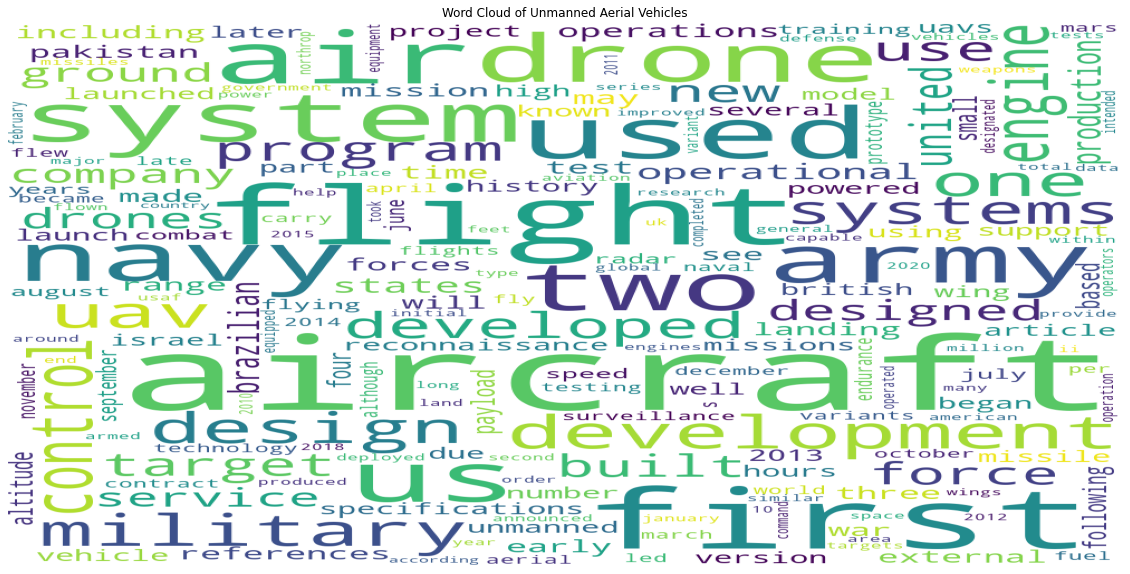

In [13]:
#generete world cloud...

wordC = WordCloud(background_color='white', width=1000, height=1000,
                 max_words=200).generate_from_frequencies(text_dic)

plt.figure(figsize=(20,10))
plt.imshow(wordC, aspect='auto')
plt.axis('off')
plt.title('Word Cloud of Unmanned Aerial Vehicles')
plt.savefig('wordC.png', bbox_inches='tight')
